In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('lalonde.csv')

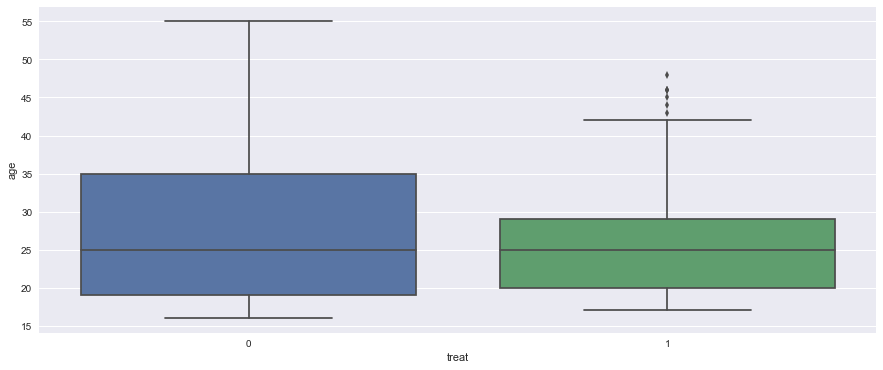

In [4]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x = 'treat', y = 'age', data = df);

In [5]:
df_new = pd.melt(df, id_vars = ['treat'], value_vars = ['re74', 're75', 're78'])

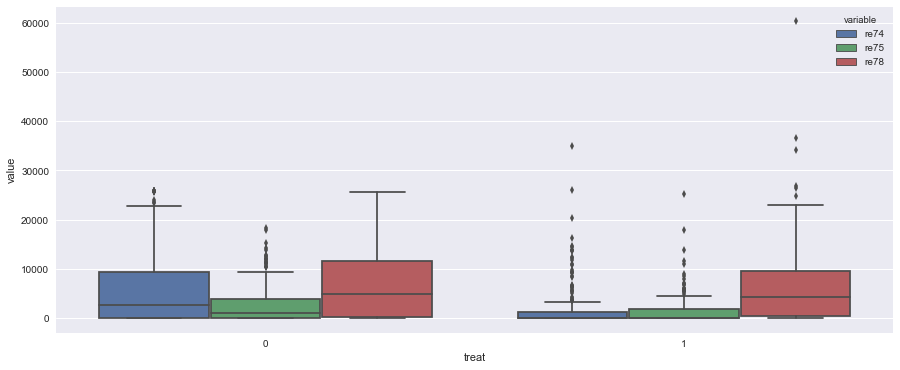

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x = 'treat', y = 'value', hue = 'variable', data = df_new);

In [7]:
df_new = pd.melt(df, id_vars = ['treat'], value_vars = ['black', 'nodegree', 'married'])

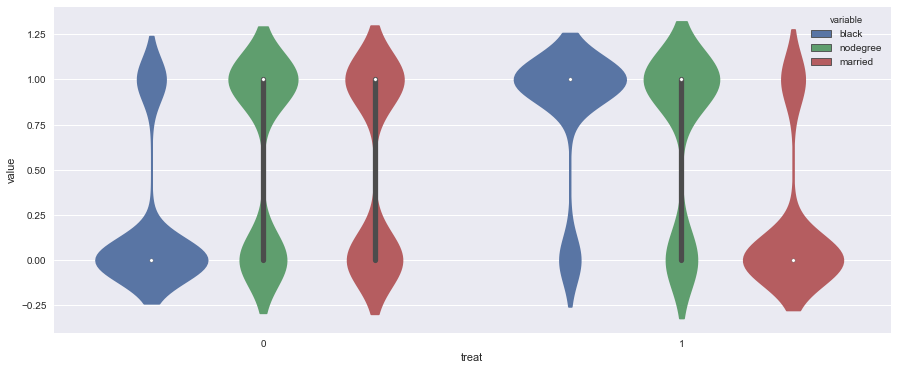

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.violinplot(x = 'treat', y = 'value', hue = 'variable', data = df_new);

In [10]:
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [11]:
y = df['treat']

In [14]:
x = df[['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75']]

In [29]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(C=10)

In [30]:
logistic.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
logistic.score(x,y)

0.80618892508143325

In [70]:
prop = logistic.predict_proba(x)
prop2 = np.zeros((prop.shape[0],))
for i in range(prop.shape[0]):
    prop2[i] = prop[i][df.iloc[i]['treat']]

In [71]:
df['propensity'] = pd.Series(prop2, index = df.index)

In [73]:
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.443733
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.134777
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.737936
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.673133
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.709447


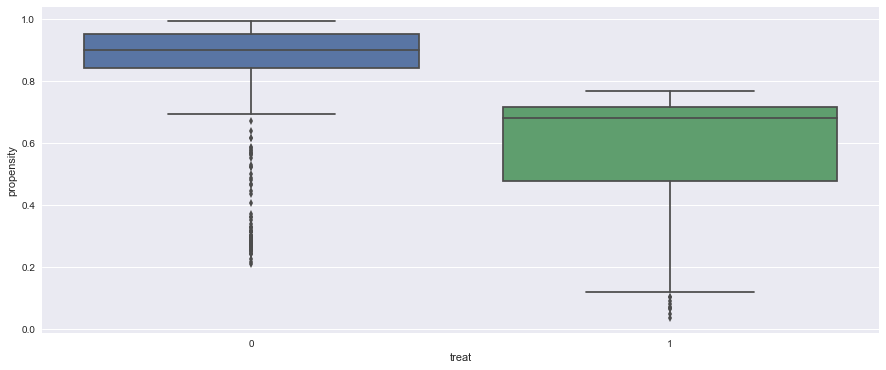

In [76]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x = 'treat', y = 'propensity', data = df);